<a href="https://colab.research.google.com/github/nqtien12/Week4/blob/main/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=aa7d7ad432d027b92d2acf91ba09f2fbe87375862d34d51cf3a74bb107c154d1
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


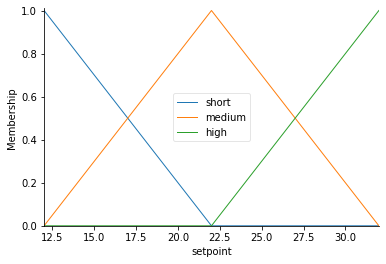

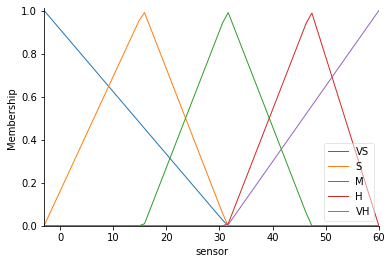

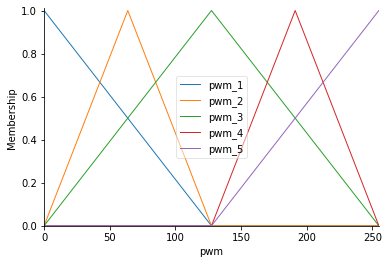

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

universe = np.linspace(12,32,61) 
universe1 = np.linspace(-3,60,61)
universe2 = np.linspace(0,255,61)

setpoint = ctrl.Antecedent(universe, 'setpoint')
sensor = ctrl.Antecedent(universe1, 'sensor')
pwm = ctrl.Consequent(universe2, 'pwm')

setpoint['short'] = fuzz.trimf(setpoint.universe, [12, 12, 22])
setpoint['medium'] = fuzz.trimf(setpoint.universe, [12, 22, 32])
setpoint['high'] = fuzz.trimf(setpoint.universe, [22, 32, 32])
setpoint.view()

sensor['VS'] = fuzz.trimf(sensor.universe, [-3, -3, 31.5])        # VS: very_slow
sensor['S'] = fuzz.trimf(sensor.universe, [-3, 15.75, 31.5])      # S: Slow
sensor['M'] = fuzz.trimf(sensor.universe, [15.75, 31.5, 47.25])   # M: medium
sensor['H'] = fuzz.trimf(sensor.universe, [31.5, 47.25, 60])      # H: High
sensor['VH'] = fuzz.trimf(sensor.universe, [31.5, 60, 60])        # VH: Very_high
sensor.view()

pwm['pwm_1'] = fuzz.trimf(pwm.universe, [0, 0, 255/2])
pwm['pwm_2'] = fuzz.trimf(pwm.universe, [0, 255/4, 255/2])
pwm['pwm_3'] = fuzz.trimf(pwm.universe, [0, 255/2, 255])
pwm['pwm_4'] = fuzz.trimf(pwm.universe, [255/2, 765/4, 255])
pwm['pwm_5'] = fuzz.trimf(pwm.universe, [255/2, 255, 255])
pwm.view()

rule0 = ctrl.Rule(antecedent=((setpoint['short'] & sensor['VS']| setpoint['short'] & sensor['S']| (setpoint['medium'] & sensor['VS']))), consequent= pwm['pwm_1'], label='rule_VS')
rule1 = ctrl.Rule(antecedent=((setpoint['short'] & sensor['M']| setpoint['short'] & sensor['H']| (setpoint['medium'] & sensor['S']| (setpoint['high'] & sensor['VS'])))), consequent= pwm['pwm_2'], label='rule_S')
rule2 = ctrl.Rule(antecedent=((setpoint['short'] & sensor['VH']| setpoint['medium'] & sensor['M']| (setpoint['high'] & sensor['S']))), consequent= pwm['pwm_3'], label='rule_M')
rule3 = ctrl.Rule(antecedent=((setpoint['medium'] & sensor['H']| setpoint['high'] & sensor['M']| (setpoint['high'] & sensor['H']))), consequent= pwm['pwm_4'], label='rule_H')
rule4 = ctrl.Rule(antecedent=((setpoint['medium'] & sensor['VH']| setpoint['high'] & sensor['VH'])), consequent= pwm['pwm_5'], label='rule_VH')


113.73390804597695


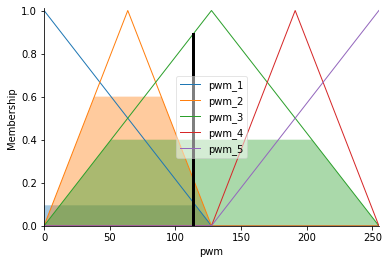

In [ ]:

from matplotlib.legend import time
import matplotlib
from skfuzzy.control.controlsystem import ControlSystemSimulation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pwming_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4,rule0])
pwming = ctrl.ControlSystemSimulation(pwming_ctrl)
pwming.input['setpoint'] = 16
pwming.input['sensor'] = 30
pwming.compute()
print(pwming.output['pwm'])
pwm.view(sim = pwming)